# Ridge Histogram Plots
from unidentified sources

### Import Libraries

In [67]:
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt 
from IPython.display import display
from tqdm import tqdm_notebook
import tqdm
import seaborn as sns
sns.set(font_scale=1.3, rc={'axes.facecolor':'white', 'figure.facecolor':'white' , 'axes.grid':True} , style="whitegrid")
from IPython.display import Markdown as md
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [116]:
d_name = 'mode' 
m_name = 'RF'
train_df = pd.read_csv(f'temp_res_comp/train_prob/{d_name}_{m_name}.csv' ,)
u_df = pd.read_csv(f'temp_res_comp/unid_prob/{m_name}_{d_name}.csv' ,)
classes = ['AGN' ,'YSO' ,'STAR' ,'HMXB' ,'LMXB' ,'ULX' ,'CV' ,'PULSAR']

In [117]:
u_df

,Unnamed: 0,class,prob,prob_margin,prob_AGN,prob_CV,prob_HMXB,prob_LMXB,prob_PULSAR,prob_STAR,prob_ULX,prob_YSO
0,2CXO J004829.5-732959,HMXB,0.415597,0.263594,0.143843,0.097607,0.415597,0.0100,0.033680,0.152003,0.109582,0.037688
1,2CXO J005449.0-725128,HMXB,0.454735,0.230054,0.224681,0.079088,0.454735,0.0050,0.030833,0.067647,0.078015,0.060000
2,2CXO J010049.1-731526,HMXB,0.596107,0.471213,0.124895,0.044431,0.596107,0.0025,0.016640,0.086987,0.102707,0.025732
3,2CXO J010049.8-731045,HMXB,0.420295,0.196160,0.224135,0.097568,0.420295,0.0025,0.026171,0.075192,0.095964,0.058176
4,2CXO J010647.7-730940,STAR,0.327500,0.115000,0.087500,0.122500,0.212500,0.0400,0.092500,0.327500,0.017500,0.100000
...,...,...,...,...,...,...,...,...,...,...,...,...
39888,2CXO J220433.1-495916,HMXB,0.276694,0.078583,0.148236,0.147611,0.276694,0.0225,0.033056,0.106069,0.198111,0.067722
39889,2CXO J220508.3-495935,HMXB,0.311250,0.091250,0.153125,0.220000,0.311250,0.0425,0.037500,0.083125,0.117500,0.035000
39890,2CXO J220544.0-495505,HMXB,0.286985,0.083897,0.098640,0.203088,0.286985,0.0650,0.027500,0.123272,0.078015,0.117500
39891,2CXO J220555.6-500837,HMXB,0.318333,0.162708,0.155625,0.115833,0.318333,0.0525,0.062500,0.105000,0.110208,0.080000


### ROC-AUC curve

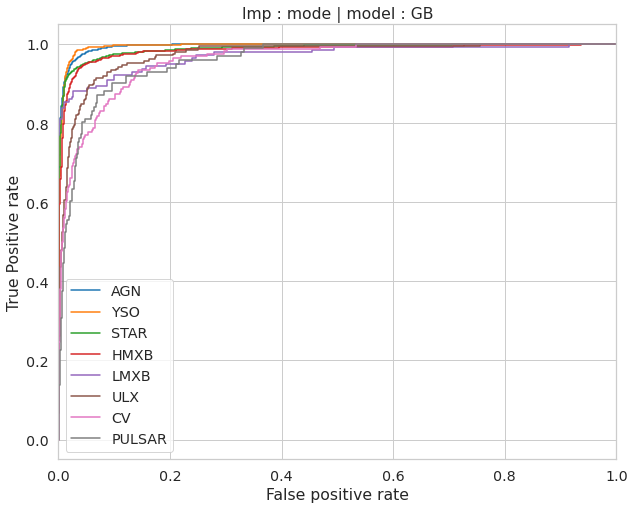

In [53]:
from sklearn.metrics import roc_curve
fig , ax = plt.subplots(nrows=1 , ncols=1 , figsize=(10,8))
fpr , tpr , th = {} ,{} ,{}
sns.set_palette('tab10')
for cl in classes:
#cl = 'ULX'
    temp_res = train_df.copy()
    temp_res['true_class']  = [1 if el==cl else 0 for el in temp_res['true_class']]
    fpr , tpr , th = roc_curve(temp_res['true_class'] , temp_res[f'prob_{cl}'] , )
    ax.plot(fpr,tpr , label=cl)
    ax.set_xlim(0,1)
plt.ylabel('True Positive rate')
plt.xlabel('False positive rate')
plt.title(f'Imp : {d_name} | model : {m_name}')
plt.legend()
plt.savefig(f'temp_res_comp/roc-auc/{d_name}_{m_name}.png')
plt.show()

### Confusion Matrix

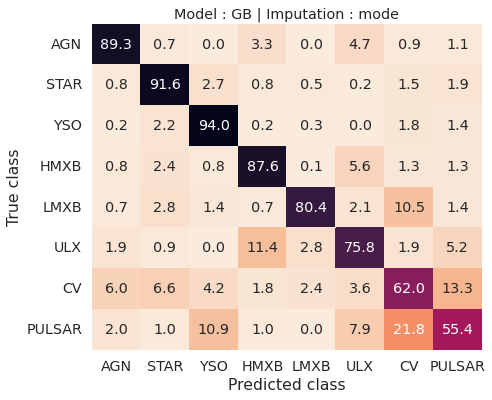

In [54]:
from utilities import plot_cf
plot_dict_def = {
    'title' : False , 
    'font_scale' : 1.2 ,
    'cbar' : False ,
    'plot_num' : 0,
}
fig , ax = plt.subplots(nrows=1 , ncols=1 , figsize=(7,6))
plot_cf([train_df] , plot_dict=plot_dict_def , confidance=0. , ax=ax)
plt.title(f'Model : {m_name} | Imputation : {d_name}')
plt.savefig(f'temp_res_comp/cf/{m_name}_{d_name}.png')
plt.show()

### Scores

In [ ]:
from utilities import get_score
score = get_score([train_df])
score

{'classes': array(['AGN', 'CV', 'HMXB', 'LMXB', 'PULSAR', 'STAR', 'ULX', 'YSO'],
       dtype=object),
 'num_src':         pred_class
 STAR          2727
 AGN           2310
 YSO           1156
 HMXB           792
 ULX            252
 CV             187
 PULSAR         143
 LMXB           136,
 'balanced_accuracy': 0.7618419296887311,
 'accuracy': 0.8986109308061794,
 'precision': 0.9064956234844224,
 'recall': 0.8986109308061794,
 'f1': 0.9020081432468129,
 'class_scores':         recall_score  precision_score  f1_score
 class                                          
 AGN         0.933194         0.967532  0.950053
 CV          0.548193         0.486631  0.515581
 HMXB        0.834225         0.787879  0.810390
 LMXB        0.790210         0.830882  0.810036
 PULSAR      0.495050         0.349650  0.409836
 STAR        0.937993         0.959663  0.948704
 ULX         0.635071         0.531746  0.578834
 YSO         0.920801         0.915225  0.918004}

### Train Data pred Histogram

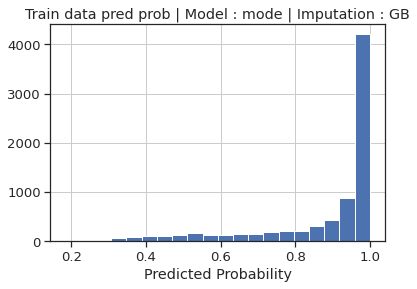

In [55]:
plt.hist(train_df['pred_prob'] , bins=20)
plt.title(f'Train data pred prob | Model : {d_name} | Imputation : {m_name}')
plt.xlabel('Predicted Probability')
plt.savefig(f'temp_res_comp/train_prob_dist/{d_name}_{m_name}.jpg')
plt.show()

### Unidentified sources

In [73]:
mode = u_df['prob'].mode()
mode

0    0.637279
dtype: float64

In [92]:
u_df['prob'].describe()

count    58356.000000
mean         0.689919
std          0.236295
min          0.185302
25%          0.481390
50%          0.700616
75%          0.929065
max          1.000000
Name: prob, dtype: float64

In [89]:
prob_list = np.asarray(u_df['prob'])

In [100]:
np.savetxt('tmep.csv' , prob_list , )

In [81]:
u_df_num = u_df['class'].value_counts().to_frame()
u_df_num = pd.concat([
                u_df['class'].value_counts() ,
                u_df[u_df['prob']>mode]['class'].value_counts(),
                u_df[u_df['prob']>0.6]['class'].value_counts(),
                u_df[u_df['prob']>0.7]['class'].value_counts(),
                u_df[u_df['prob']>0.8]['class'].value_counts(),
                u_df[u_df['prob']>0.9]['class'].value_counts(),
                u_df[u_df['prob']>0.98]['class'].value_counts(),
                 ] , axis=1)
u_df_num.columns = ['Argmax' , f"Most probable Prob {mode}" ,'0.6' ,'0.7' ,'0.8' ,'0.9' ,'0.98']
u_df_num.index.name = 'class'
#u_df_num.to_csv(f'temp_res_comp/unid_num/{d_name}_{m_name}.csv')
print(u_df_num.to_markdown())

ValueError: Can only compare identically-labeled Series objects

In [ ]:
from numpy.random import normal
from ridgeplot import ridgeplot
cl = classes[::-1]
sample = [u_df[u_df['class']==c]['prob'] for c in cl]

In [ ]:
fig = ridgeplot(
    samples=sample,
    kde_points=np.linspace(0, 1, 500),
    colorscale="inferno",
    colormode="index",
    coloralpha=0.6,
    labels=cl,
    spacing = 3 / 8,
    xpad=0
)
fig.update_layout(
    title=f"Unidentified sources | Imputation : {d_name} | classifier : {m_name}",
    height=550,
    width=600,
    plot_bgcolor="rgba(255, 255, 255, 0.0)",
    xaxis_gridcolor="rgba(0, 0, 0, 0.1)",
    yaxis_gridcolor="rgba(0, 0, 0, 0.1)",
    xaxis_title="Predicted Probability",
    yaxis_title="Predicted Probability Density",
)

#fig.save('temp.png')
#fig.write_image(f'temp_res_comp/unid_prob_dist/{m_name}_{d_name}.jpg')
fig.show()